In [1]:
#John David Conley
#Deep Learning ICP 9
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


1. Add one more hidden layer to autoencoder
2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. 
  
  Also, visualize the same test data before reconstruction using Matplotlib
3. Repeat the question 2 on the denoisening autoencoder
4. plot loss and accuracy using the history object

In [32]:
#original
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

hist = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 2s 4ms/step - loss: 0.6963 - val_loss: 0.6962
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6961 - val_loss: 0.6960
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6958 - val_loss: 0.6957
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6954 - val_loss: 0.6952


In [33]:
#1
from keras.layers import Input, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img2 = Input(shape=(784,))
encoded2 = Dense(32, activation='relu')(input_img2)
# "encoded" is the encoded representation of the input
encoded2 = Dense(encoding_dim, activation='relu')(encoded2)
decoded2 = Dense(32, activation='sigmoid')(encoded2)
# "decoded" is the lossy reconstruction of the input
decoded2 = Dense(784, activation='sigmoid')(decoded2)
# this model maps an input to its reconstruction
autoencoder2 = Model(input_img2, decoded2)

# this model maps an input to its encoded representation
autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train2, y_train2), (x_test2, y_test2) = fashion_mnist.load_data()
x_train2 = x_train2.astype('float32') / 255.
x_test2 = x_test2.astype('float32') / 255.
x_train2 = x_train2.reshape((len(x_train2), np.prod(x_train2.shape[1:])))
x_test2 = x_test2.reshape((len(x_test2), np.prod(x_test2.shape[1:])))

hist2 = autoencoder2.fit(x_train2, x_train2,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6929 - val_loss: 0.6927


In [34]:
#2
autoencoder2.predict(x_test2)

313/313 [==============================] - 1s 2ms/step


array([[0.5138446 , 0.53620106, 0.49979028, ..., 0.47240138, 0.5545939 ,
        0.59347326],
       [0.49451515, 0.5355793 , 0.50832814, ..., 0.47196442, 0.56423354,
        0.593329  ],
       [0.5035317 , 0.5395203 , 0.50943947, ..., 0.4688609 , 0.5625031 ,
        0.5966776 ],
       ...,
       [0.50669116, 0.53193086, 0.5049001 , ..., 0.47204968, 0.56009567,
        0.5985985 ],
       [0.50929505, 0.5376162 , 0.5047892 , ..., 0.47101364, 0.5590605 ,
        0.59442246],
       [0.5143667 , 0.53556144, 0.4996325 , ..., 0.47233802, 0.55412084,
        0.59473985]], dtype=float32)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions2= autoencoder.predict(x_test2)
y_predictions2.reshape(-1,)
y_predictions2= np.argmax(y_predictions2, axis=1)

matrix2=confusion_matrix(y_test2, y_predictions2)
matrix2

313/313 [==============================] - 0s 1ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

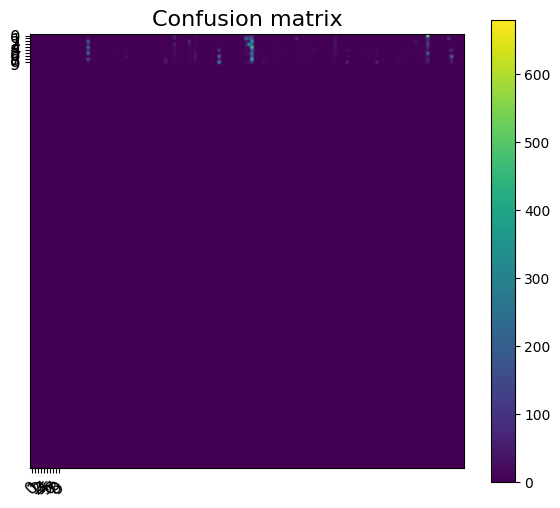

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(matrix2)
plt.xticks(np.arange(10), rotation=45, fontsize=12)
plt.yticks(np.arange(10), fontsize=12)
plt.colorbar()
plt.show()

In [37]:
autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


array([[0.51740783, 0.5219225 , 0.4910666 , ..., 0.5032897 , 0.5106611 ,
        0.47980428],
       [0.5280656 , 0.50759906, 0.4309732 , ..., 0.4640401 , 0.45156604,
        0.5574015 ],
       [0.4822224 , 0.5116679 , 0.5033269 , ..., 0.47596148, 0.49613723,
        0.4950716 ],
       ...,
       [0.5013361 , 0.50427413, 0.48862112, ..., 0.49020675, 0.492267  ,
        0.52475166],
       [0.50123084, 0.49874538, 0.4964034 , ..., 0.49341363, 0.498743  ,
        0.5015028 ],
       [0.5168387 , 0.5225107 , 0.49109265, ..., 0.5019658 , 0.5036699 ,
        0.48384944]], dtype=float32)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= autoencoder.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

matrix=confusion_matrix(y_test, y_predictions)
matrix

313/313 [==============================] - 0s 1ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

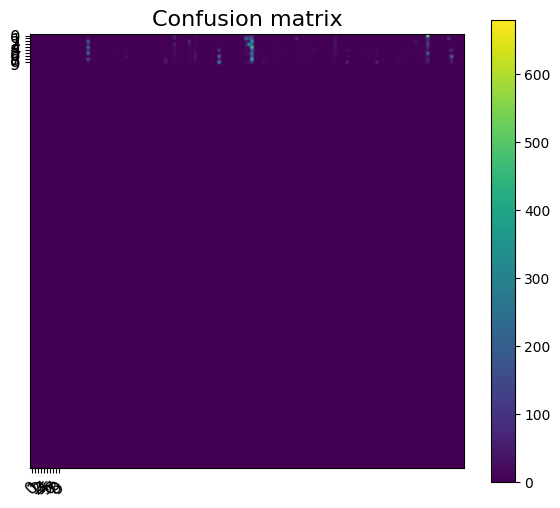

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(matrix)
plt.xticks(np.arange(10), rotation=45, fontsize=12)
plt.yticks(np.arange(10), fontsize=12)
plt.colorbar()
plt.show()

In [65]:
#3
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img3 = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded3 = Dense(encoding_dim, activation='relu')(input_img3)
# "decoded" is the lossy reconstruction of the input
decoded3 = Dense(784, activation='sigmoid')(encoded3)
# this model maps an input to its reconstruction
autoencoder3 = Model(input_img3, decoded3)
# this model maps an input to its encoded representation
autoencoder3.compile(optimizer='adadelta', loss='binary_crossentropy', metrics= ['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train3, _), (x_test3, _) = fashion_mnist.load_data()
x_train3 = x_train3.astype('float32') / 255.
x_test3 = x_test3.astype('float32') / 255.
x_train3 = x_train3.reshape((len(x_train3), np.prod(x_train3.shape[1:])))
x_test3 = x_test3.reshape((len(x_test3), np.prod(x_test3.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train3_noisy = x_train3 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train3.shape)
x_test3_noisy = x_test3 + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test3.shape)

hist3 = autoencoder3.fit(x_train3_noisy, x_train3,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test3_noisy, x_test3_noisy))


Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.6987 - accuracy: 6.5000e-04 - val_loss: 0.6986 - val_accuracy: 0.0013
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6984 - accuracy: 6.6667e-04 - val_loss: 0.6983 - val_accuracy: 0.0014
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6981 - accuracy: 6.8333e-04 - val_loss: 0.6980 - val_accuracy: 0.0015
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6978 - accuracy: 6.6667e-04 - val_loss: 0.6977 - val_accuracy: 0.0015
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6975 - accuracy: 7.0000e-04 - val_loss: 0.6974 - val_accuracy: 0.0015
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6972 - accuracy: 7.0000e-04 - val_loss: 0.6972 - val_accuracy: 0.0014
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6969 - accuracy: 7.1667e-04 - val_loss: 0.6969 -

In [66]:
autoencoder3.predict(x_test3_noisy)

313/313 [==============================] - 0s 1ms/step


array([[0.5298073 , 0.45518252, 0.45384377, ..., 0.48033813, 0.4884784 ,
        0.4791563 ],
       [0.48894903, 0.5023977 , 0.47884363, ..., 0.43196204, 0.47434428,
        0.45228842],
       [0.5243724 , 0.45896682, 0.5409606 , ..., 0.51343346, 0.5368529 ,
        0.49121165],
       ...,
       [0.5033892 , 0.4738743 , 0.4418395 , ..., 0.42823386, 0.44537184,
        0.50568515],
       [0.50456154, 0.48299038, 0.5236003 , ..., 0.46814433, 0.46274075,
        0.53046745],
       [0.5045909 , 0.5146044 , 0.4668822 , ..., 0.48044136, 0.4868547 ,
        0.48451266]], dtype=float32)

In [67]:
autoencoder3.predict(x_test3)

313/313 [==============================] - 1s 2ms/step


array([[0.49301147, 0.48894554, 0.48318112, ..., 0.5026109 , 0.4823148 ,
        0.48593384],
       [0.49489927, 0.49176022, 0.48357135, ..., 0.4554786 , 0.49219793,
        0.48607752],
       [0.4656355 , 0.5057061 , 0.5555729 , ..., 0.5025469 , 0.51347953,
        0.46841472],
       ...,
       [0.49279118, 0.49287683, 0.48646098, ..., 0.47987652, 0.47026545,
        0.4858449 ],
       [0.47375375, 0.52862066, 0.5224803 , ..., 0.49175307, 0.5047056 ,
        0.5145907 ],
       [0.48760554, 0.5091939 , 0.49490657, ..., 0.50786775, 0.49713582,
        0.4884207 ]], dtype=float32)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions3= autoencoder.predict(x_test3_noisy)
y_predictions3.reshape(-1,)
y_predictions3= np.argmax(y_predictions3, axis=1)

matrix3=confusion_matrix(_, y_predictions3)
matrix3

313/313 [==============================] - 0s 1ms/step


array([[1, 0, 0, ..., 5, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 5, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

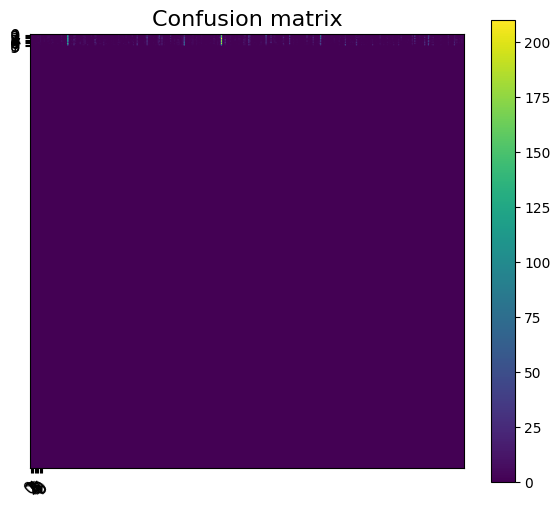

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(matrix3)
plt.xticks(np.arange(10), rotation=45, fontsize=12)
plt.yticks(np.arange(10), fontsize=12)
plt.colorbar()
plt.show()

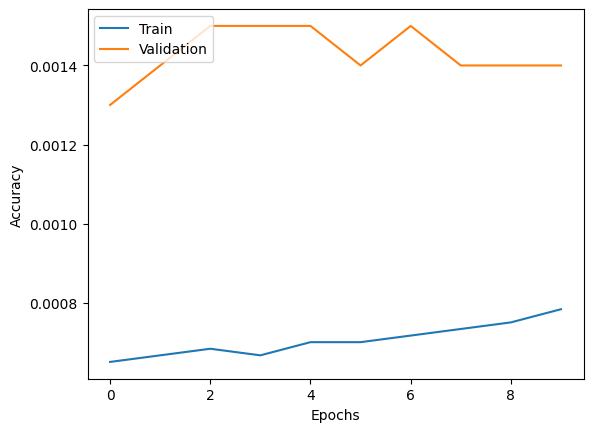

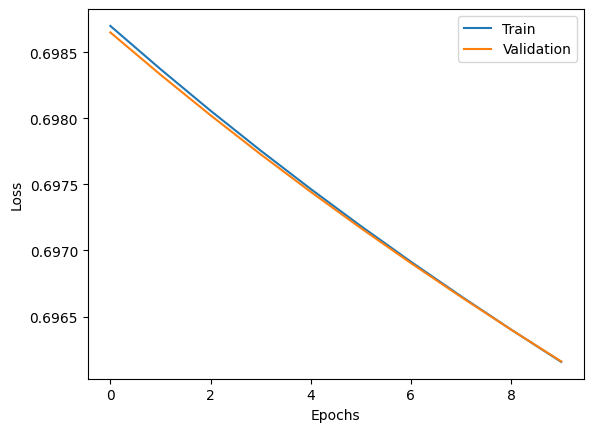

In [70]:
#4
# summarize history for accuracy
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()